In [22]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Read CSV File using Pandas
df = pd.read_csv('Diwali Sales Data.csv', encoding= 'unicode_escape')

#**Profile of Data (Basic Analysis of Data)**

In [3]:
df.shape

(11251, 15)

In [4]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [6]:
#Drop Status and unnamed1 beacuse blank value present and not useful for our analysis.
df.drop(['Status', 'unnamed1'], axis=1, inplace=True)

In [7]:
#Check for null values
pd.isnull(df).sum()

,0
User_ID,0
Cust_name,0
Product_ID,0
Gender,0
Age Group,0
Age,0
Marital_Status,0
State,0
Zone,0
Occupation,0


In [8]:
#Drop null values
df.dropna(inplace=True)

In [9]:
#Change data type
df['Amount'] = df['Amount'].astype('int')

In [10]:
df['Amount'].dtypes

dtype('int64')

In [11]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [12]:
#Statistic Data
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount
count,1.123900e+04,11239.000000,11239.000000,11239.000000,11239.000000
mean,1.003004e+06,35.410357,0.420055,2.489634,9453.610553
std,1.716039e+03,12.753866,0.493589,1.114967,5222.355168
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000
25%,1.001492e+06,27.000000,0.000000,2.000000,5443.000000
50%,1.003064e+06,33.000000,0.000000,2.000000,8109.000000
75%,1.004426e+06,43.000000,1.000000,3.000000,12675.000000
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000


In [13]:
#Use describe() for Age, Order and Amount columns
df[['Age', 'Orders', 'Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


#**Univariate Analysis**

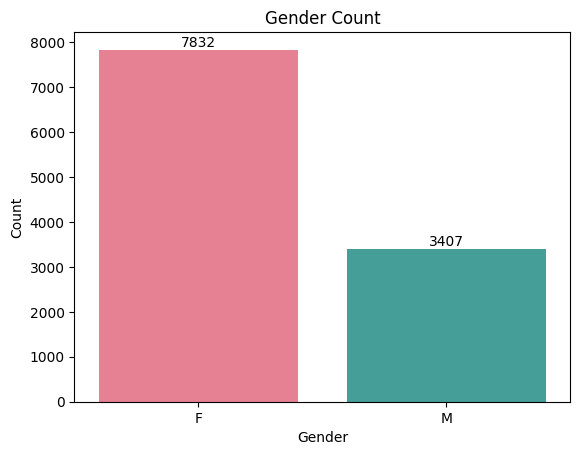

In [16]:
#Create a bar chart for Gender and it's count
ax = sns.countplot(x = 'Gender',data = df, hue = 'Gender', palette= 'husl', legend=False)

for bars in ax.containers:
    ax.bar_label(bars)

plt.title('Gender Count')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

**Insight**-Majority of the customer is Female.

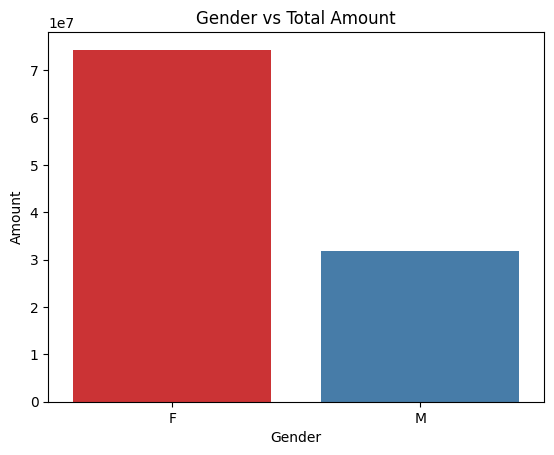

In [28]:
#Create a bar chart for gender vs total amount
sales_gen = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.barplot(x = 'Gender',y= 'Amount' ,data = sales_gen, hue = 'Gender', palette= 'Set1', legend=False)
plt.title('Gender vs Total Amount')
plt.show()

**Insight**-We can see that most of the buyers are females and even the purchasing power of females are greater than men

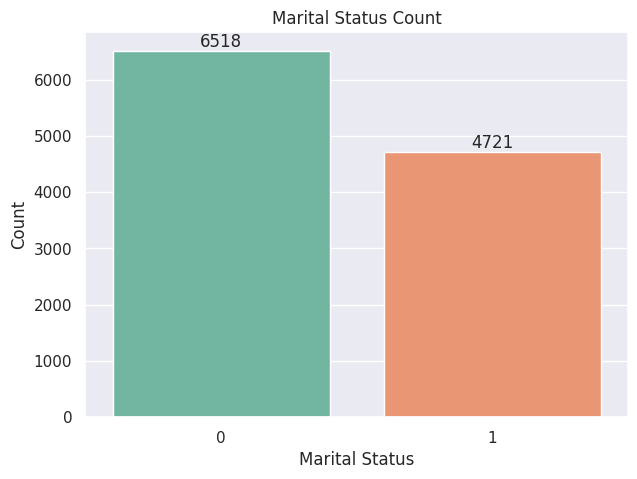

In [59]:
#Create a Countplot for Marital Status
ax = sns.countplot(data = df, x = 'Marital_Status', palette = 'Set2')

sns.set(rc={'figure.figsize':(7,5)})
for bars in ax.containers:
    ax.bar_label(bars)

plt.title('Marital Status Count')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

**Insight**-From above graphs we can see that most of the buyers are married one

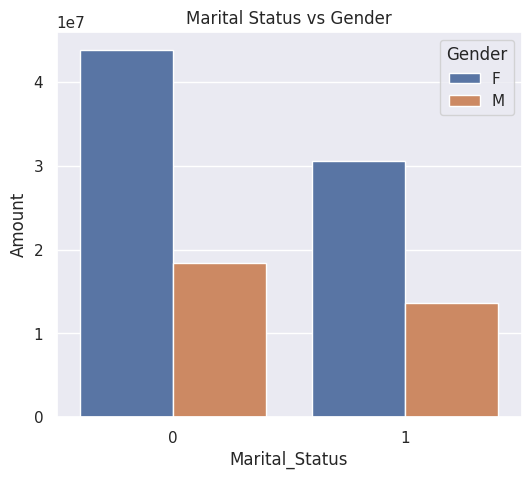

In [64]:
#Create a barchart for Marital Status and Amount (Hue = Gender)
maritalst_sales = df.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(6,5)})
sns.barplot(data = maritalst_sales, x = 'Marital_Status',y= 'Amount', hue='Gender')

plt.title('Marital Status vs Gender')
plt.show()

In [65]:
maritalst_sales

,Marital_Status,Gender,Amount
0,0,F,43786646
2,1,F,30549207
1,0,M,18338738
3,1,M,13574538


**Insight**-From above graphs we can see that most of the buyers are married (women) and they have high purchasing power

#**Bivariate Analysis**

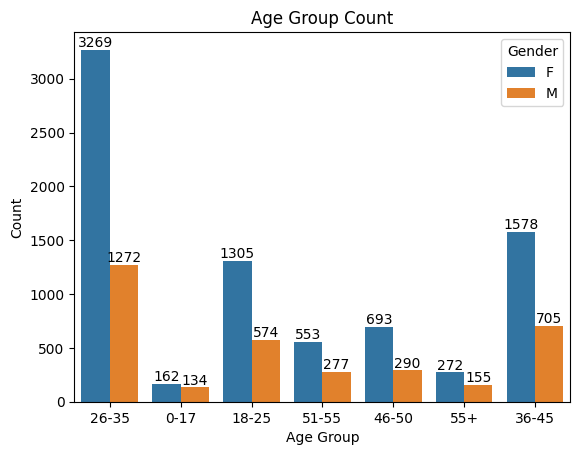

In [29]:
#Create a countplot of Age Group and use Hue as Gender
ax = sns.countplot(data = df, x = 'Age Group', hue = 'Gender')

for bars in ax.containers:
    ax.bar_label(bars)

plt.title('Age Group Count')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

**Insight**-Females of age group 26-35 Spends more

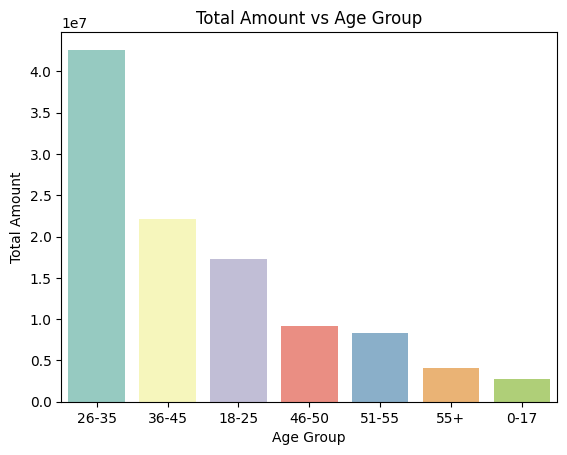

In [33]:
# Create a barplot for Total Amount vs Age Group
sales_age = df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.barplot(x = 'Age Group',y= 'Amount' ,data = sales_age, palette="Set3")
plt.xlabel('Age Group')
plt.ylabel('Total Amount')
plt.title('Total Amount vs Age Group')
plt.show()

**Insight**-Age group 26-35 Spends more

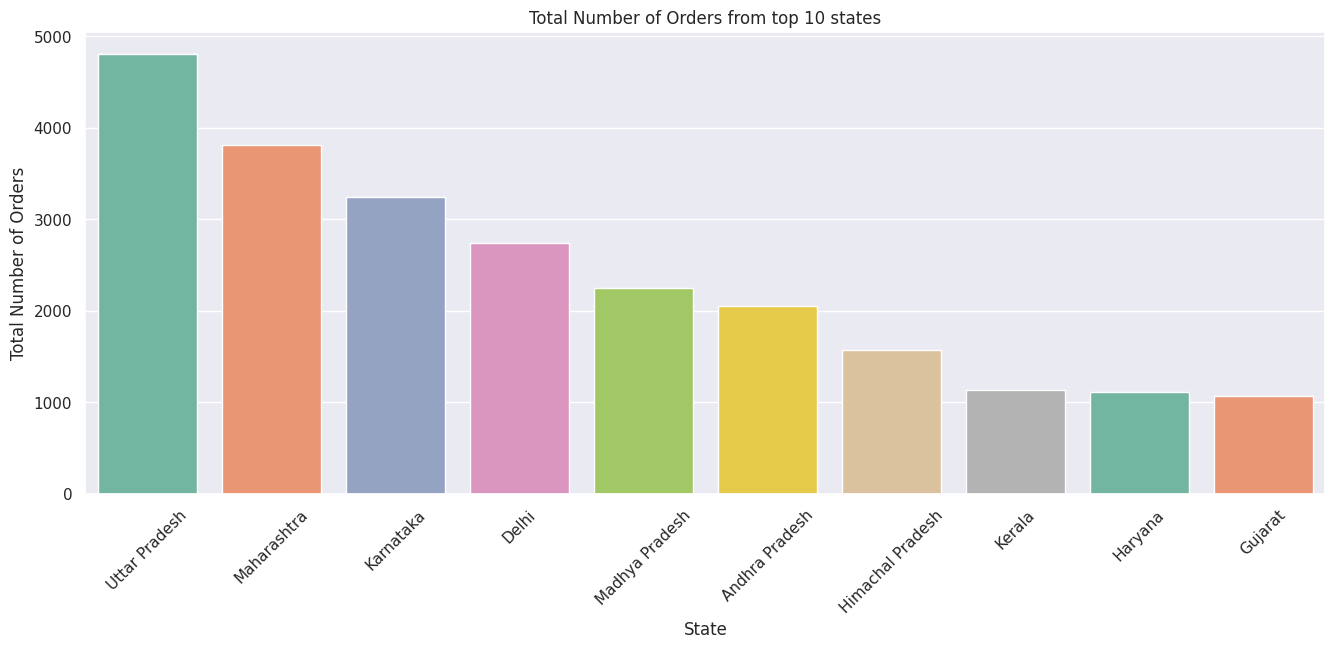

In [44]:
#Create a barplot for  total number of orders from top 10 states
Order_state = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(16,6)})
sns.barplot(data = sales_state, x = 'State',y= 'Orders', palette="Set2")
plt.xlabel('State')
plt.ylabel('Total Number of Orders')
plt.title('Total Number of Orders from top 10 states')
plt.xticks(rotation=45)
plt.show()

In [45]:
Order_state

,State,Orders
14,Uttar Pradesh,4807
10,Maharashtra,3810
7,Karnataka,3240
2,Delhi,2740
9,Madhya Pradesh,2252
0,Andhra Pradesh,2051
5,Himachal Pradesh,1568
8,Kerala,1137
4,Haryana,1109
3,Gujarat,1066


**Insight**-Uttar Pradesh is the top state with most number of orders (4807).

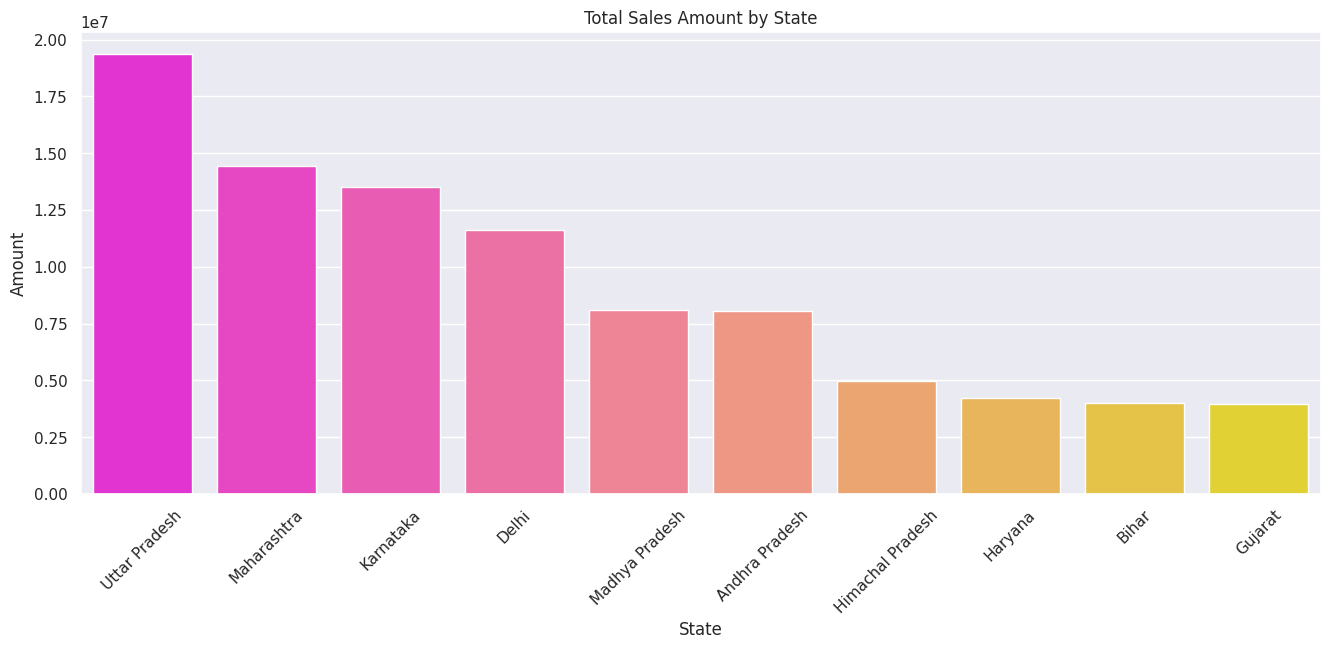

In [48]:
#Create a Barplot for total amount/sales from top 10 states
sales_state = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(16,6)})
sns.barplot(data = sales_state, x = 'State',y= 'Amount', palette="spring")
plt.title('Total Sales Amount by State')
plt.xlabel('State')
plt.xticks(rotation=45)
plt.show()

In [49]:
sales_state

,State,Amount
14,Uttar Pradesh,19374968
10,Maharashtra,14427543
7,Karnataka,13523540
2,Delhi,11603818
9,Madhya Pradesh,8101142
0,Andhra Pradesh,8037146
5,Himachal Pradesh,4963368
4,Haryana,4220175
1,Bihar,4022757
3,Gujarat,3946082


**Insight**-Uttar Pradesh is the top state with most sales (1.9 Cr.). From above graphs we can see that most of the orders & total sales/amount are from Uttar Pradesh, Maharashtra and Karnataka respectively

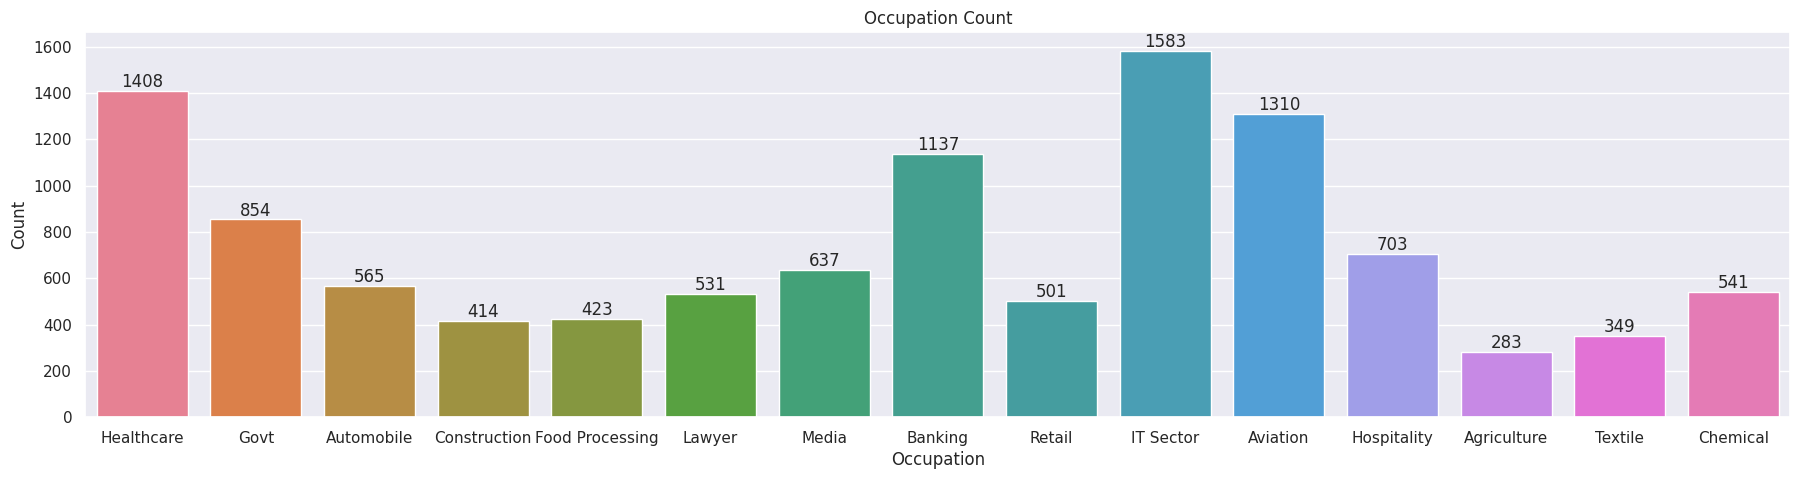

In [70]:
#Create a Countplot for Occupation
sns.set(rc={'figure.figsize':(22,5)})
ax = sns.countplot(data = df, x = 'Occupation', palette='husl')

for bars in ax.containers:
    ax.bar_label(bars)

plt.title('Occupation Count')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.show()

**Insight**-IT Sector is the most common occupation followed by Healthcare

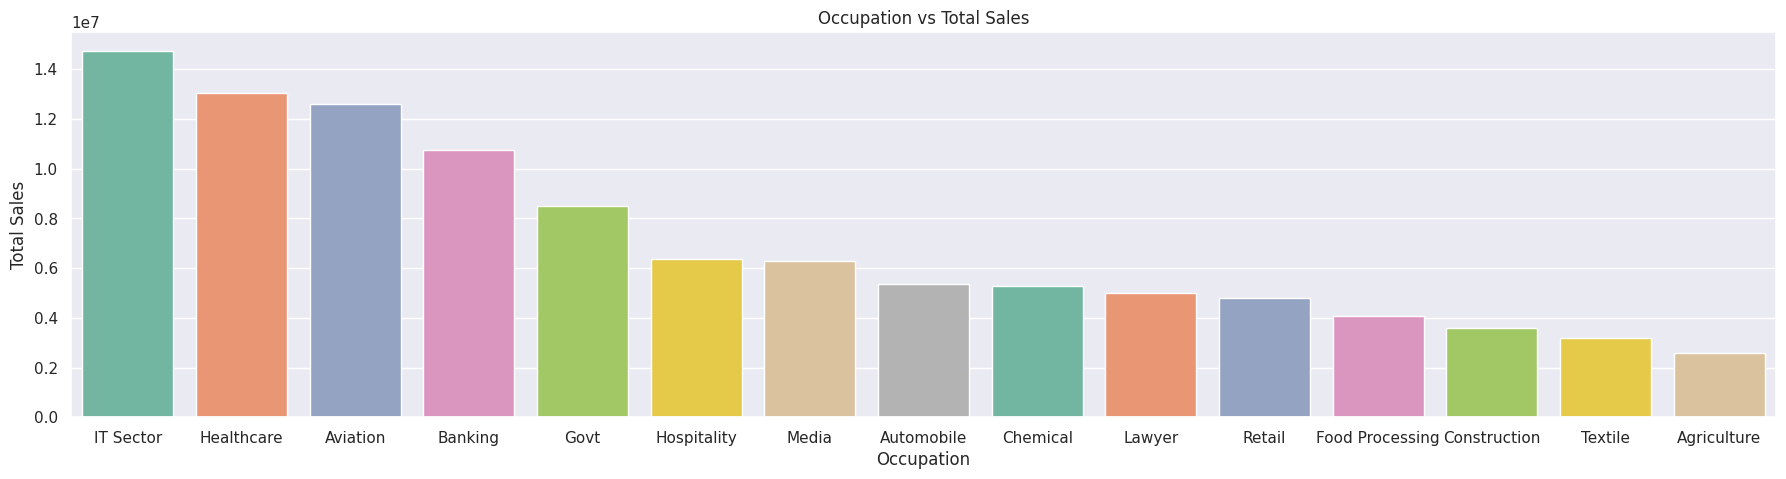

In [74]:
#Create a Barplot for Occupation and Sales
occp_sales = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(22,5)})
sns.barplot(data = occp_sales, x = 'Occupation',y= 'Amount', palette="Set2")


plt.title('Occupation vs Total Sales')
plt.xlabel('Occupation')
plt.ylabel('Total Sales')
plt.show()

In [75]:
occp_sales

,Occupation,Amount
10,IT Sector,14755079
8,Healthcare,13034586
2,Aviation,12602298
3,Banking,10770610
7,Govt,8517212
9,Hospitality,6376405
12,Media,6295832
1,Automobile,5368596
4,Chemical,5297436
11,Lawyer,4981665


**Insight**-From above graphs we can see that most of the buyers are working in IT(1.47 Cr), Healthcare(1.3 Cr.) and Aviation sector(1.26 Cr.)

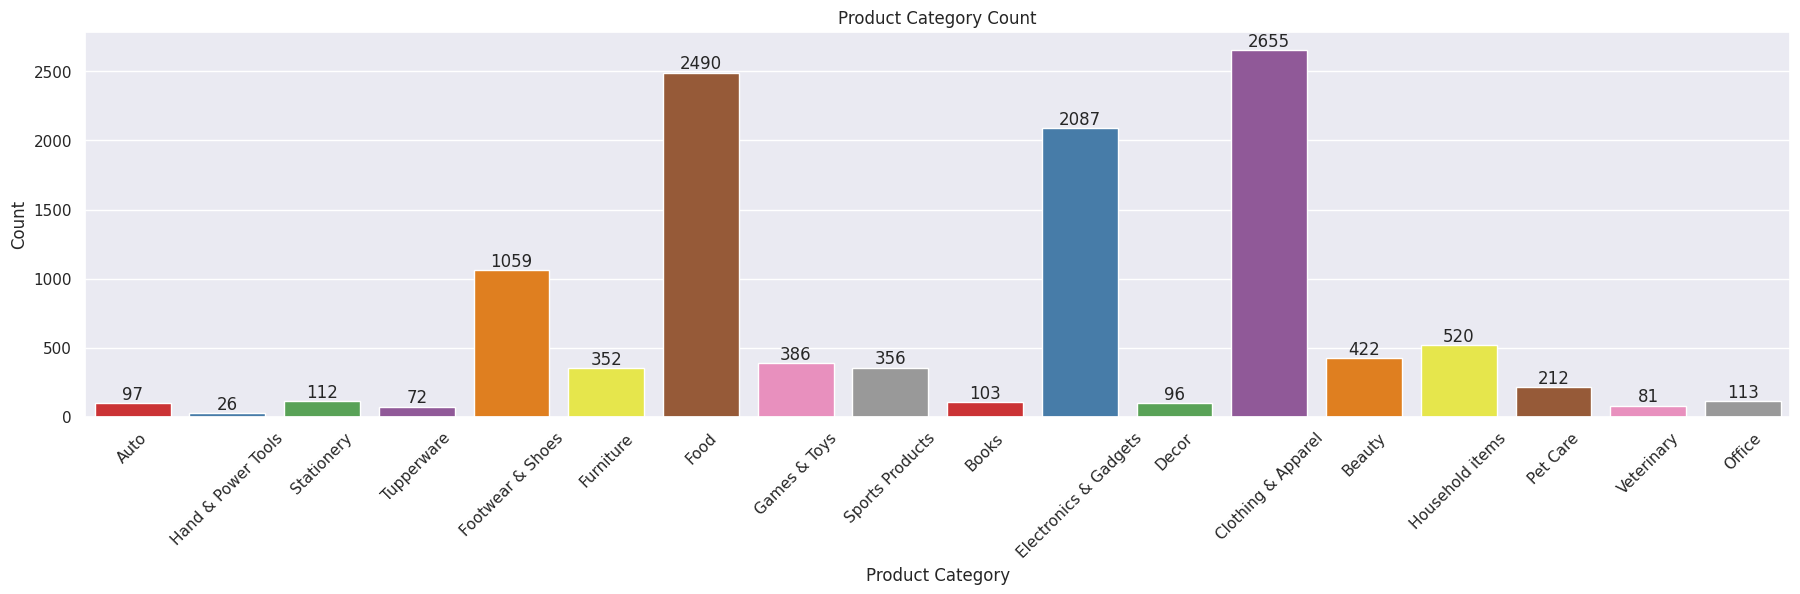

In [78]:
#Create a Countplot for Product Category
sns.set(rc={'figure.figsize':(22,5)})
ax = sns.countplot(data = df, x = 'Product_Category', palette = 'Set1')

for bars in ax.containers:
    ax.bar_label(bars)

plt.title('Product Category Count')
plt.xlabel('Product Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

**Insight**-Most of the buyers are from Food, Clothing and Electronics categories

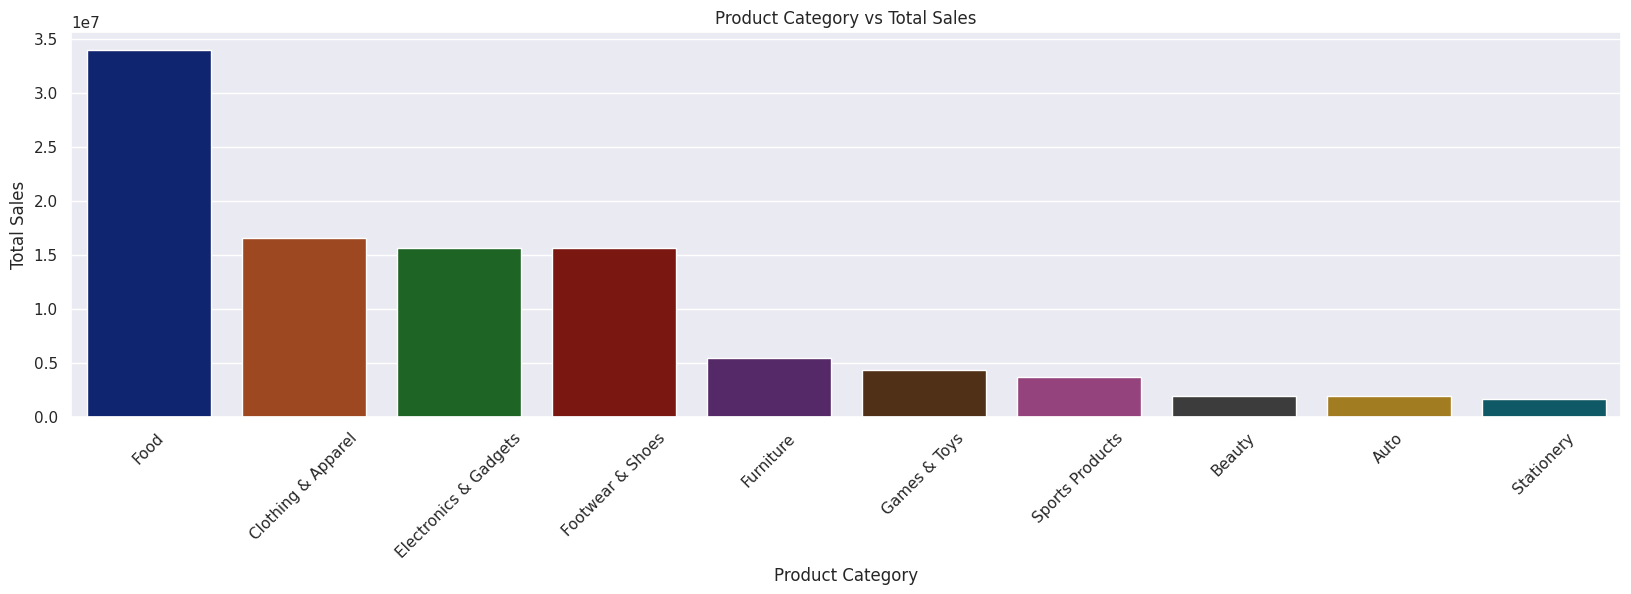

In [82]:
#Create a Barplot for Product Category and Sales
sales_prodcat = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_prodcat, x = 'Product_Category',y= 'Amount', palette= 'dark')

plt.title('Product Category vs Total Sales')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()


In [83]:
sales_prodcat

,Product_Category,Amount
6,Food,33933883
3,Clothing & Apparel,16495019
5,Electronics & Gadgets,15643846
7,Footwear & Shoes,15575209
8,Furniture,5440051
9,Games & Toys,4331694
14,Sports Products,3635933
1,Beauty,1959484
0,Auto,1958609
15,Stationery,1676051


**Insight**-Most of the sold products are from Food(3.9 Cr.), Clothing(1.64 Cr.) and Electronics categories(1.56 Cr.).

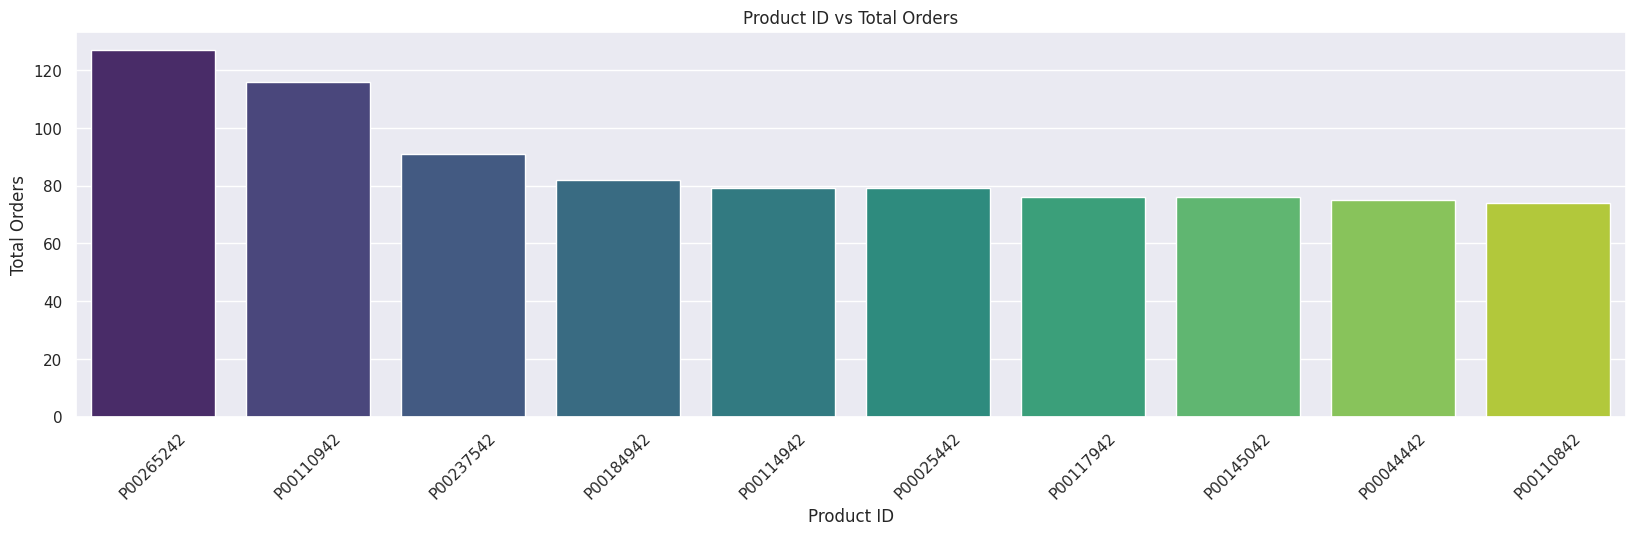

In [87]:
#Create a Countplot for Product Id and orders
sales_prodid_order = df.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_prodid_order, x = 'Product_ID',y= 'Orders', palette = 'viridis')

plt.title('Product ID vs Total Orders')
plt.xlabel('Product ID')
plt.ylabel('Total Orders')
plt.xticks(rotation=45)
plt.show()

In [88]:
sales_prodid_order

,Product_ID,Orders
1679,P00265242,127
644,P00110942,116
1504,P00237542,91
1146,P00184942,82
679,P00114942,79
171,P00025442,79
708,P00117942,76
888,P00145042,76
298,P00044442,75
643,P00110842,74


**Insight**-Top Product Id is P00265242	with orders of 127.

#**Conclusion:**

*Married women age group 26-35 yrs from UP,  Maharastra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics category*

#**Suggestions:**

*Provide special offers, early sales alert, discount and loyality program to the above category customers.*